# **ANÁLISIS EXPLORATORIO DE DATOS**

El objetivo principal del análisis exploratorio de datos es descubrir patrones, tendencias, relaciones y valores atípicos potenciales en los datos. Para lograr esto, se requiere la exploración y visualización exhaustiva de los datos utilizando diversas técnicas, lo que nos permite comprender mejor su estructura y distribución. La realización de este análisis nos permite obtener una visión más precisa y detallada de la naturaleza de los datos necesarios, lo que a su vez puede ayudarnos a realizar proyectos y tomar decisiones informadas. Vamos a trabajar con el data frame "comp_st6ns1.txt.bz2" para este análisis exploratorio.

In [487]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.


In [488]:
df = pd.read_csv('disp_st6ns1.txt.bz2', compression="bz2", index_col=0)
pd.set_option('display.max_columns', None)
df.head(3650)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,dswrf_s1_1,dswrf_s2_1,dswrf_s3_1,dswrf_s4_1,dswrf_s5_1,pres_ms1_1,pres_ms2_1,pres_ms3_1,pres_ms4_1,pres_ms5_1,pwat_ea1_1,pwat_ea2_1,pwat_ea3_1,pwat_ea4_1,pwat_ea5_1,spfh_2m1_1,spfh_2m2_1,spfh_2m3_1,spfh_2m4_1,spfh_2m5_1,tcdc_ea1_1,tcdc_ea2_1,tcdc_ea3_1,tcdc_ea4_1,tcdc_ea5_1,tcolc_e1_1,tcolc_e2_1,tcolc_e3_1,tcolc_e4_1,tcolc_e5_1,tmax_2m1_1,tmax_2m2_1,tmax_2m3_1,tmax_2m4_1,tmax_2m5_1,tmin_2m1_1,tmin_2m2_1,tmin_2m3_1,tmin_2m4_1,tmin_2m5_1,tmp_2m_1_1,tmp_2m_2_1,tmp_2m_3_1,tmp_2m_4_1,tmp_2m_5_1,tmp_sfc1_1,tmp_sfc2_1,tmp_sfc3_1,tmp_sfc4_1,tmp_sfc5_1,ulwrf_s1_1,ulwrf_s2_1,ulwrf_s3_1,ulwrf_s4_1,ulwrf_s5_1,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.0,234.401764,229.968914,234.719940,254.104944,255.286532,0.0,10.000000,180.000000,490.000000,326.363636,102228.053977,102374.235795,102232.823153,101765.694602,101681.864347,6.242829,6.954545,7.569890,7.681818,7.927869,0.002250,0.002197,0.002482,0.002582,0.002546,0.000000,0.000909,0.000909,0.012727,0.015455,0.001173,0.001855,0.001882,0.011055,0.014409,277.989785,275.545629,281.609580,284.245322,284.431277,275.391665,274.677163,274.676539,281.715143,280.094230,275.403797,275.548567,281.597326,284.248324,280.159956,273.369282,274.832203,287.590399,288.177906,277.245536,321.394958,315.977009,336.989763,398.046781,380.463043,241.789530,233.140839,237.578452,256.342403,245.431481,0,4.000000,41.636364,104.454545,71.636364,10116900
V2,0.000000,0.000909,0.127273,0.000909,0.0,276.634960,272.369578,268.436640,256.169015,246.565446,0.0,10.000000,153.636364,473.636364,324.545455,101237.345881,101445.642045,101789.610085,101749.945312,102147.579545,8.607066,8.305498,8.913901,5.013589,5.233366,0.002870,0.002404,0.003123,0.002280,0.002117,0.156364,0.037273,0.049091,0.000000,0.000000,0.157891,0.038127,0.049545,0.000673,0.000555,279.558694,280.499734,282.373130,283.015775,283.025221,276.583460,279.423351,279.423351,282.422460,279.242898,279.573525,280.088570,282.368236,282.666554,279.245922,278.293648,278.924006,284.694425,284.870927,277.314348,329.523551,340.445582,350.524819,377.472312,366.501076,204.654873,226.094627,230.027276,248.015693,252.598371,0,3.818182,33.545455,99.272727,71.818182,9262800
V3,0.000000,0.000000,0.000000,0.000000,0.0,218.280002,218.450567,226.860365,255.074577,257.385585,0.0,10.000000,180.000000,490.909091,331.090909,102300.344460,102084.100852,101606.811080,101137.279830,101182.128551,4.890406,6.303983,7.763636,9.690909,9.981818,0.002326,0.002232,0.002372,0.002301,0.002445,0.000000,0.000000,0.003636,0.002727,0.008182,0.000382,0.001618,0.004300,0.002764,0.008427,273.907368,274.061609,281.467610,285.093148,285.315288,271.422397,270.662279,270.661896,281.640877,280.586515,271.456881,274.071555,281.441734,285.093689,280.610393,269.051242,272.963717,285.659995,287.622808,277.124598,304.821664,297.842871,323.796217,387.884591,375.769393,233.928381,228.465100,233.935296,255.359149,253.256739,0,4.000000,41.727273,105.000000,73.636364,10789800
V4,0.000000,0.000000,0.000000,0.000000,0.0,232.681230,208.987453,213.493584,236.729101,241.258593,0.0,20.000000,180.000000,502.727273,337.727273,102858.782670,102961.263494,102762.752841,102299.536932,102142.354403,3.462631,3.787141,4.726539,7.286358,9.511838,0.002348,0.002337,0.002201,0.001921,0.001856,0.000000,0.000000,0.000909,0.018182,0.000000,0.000627,0.000227,0.001800,0.017191,0.000755,279.932409,273.440552,277.859536,281.104914,281.508398,273.484572,272.160051,272.157801,277.961173,277.957520,273.503335,272.745711,277.877747,281.117004,278.551009,272.224768,272.720975,285.145963,286.053497,276.391751,324.674608,308.488836,327.123660,387.025060,371.072865,236.603051,234.644049,238.489481,255.291218,249.140133,0,4.000000,44.000000,108.090909,74.909091,11816700
V5,0.000000,0.000000,0.000000,0.000000,0.0,248.980929,251.472505,

Después de recibir y descomprimir los datos necesarios, hemos impreso las 76 columnas para poder ver los datos con más claridad. Las 75 variables primeras corresponden a los valores de varios parámetros en el punto azul, hay 15 variables independientes pero cada una se calcula 5 veces al día por lo que hay un total de 75, la variables salida representa la energía eléctrica solar acumulada producida durante el día correspondiente y depende de las demás variables.

In [489]:
df.columns

Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'ulwrf_s1_1', 'ulwrf_s2_1', 'ulwrf_s3_1', 'ulwrf_s4_1', 'ulwrf_s5_1',

Como parte de este proyecto, se nos pide realizar un estudio sobre la correlación que existe entre las variable proporcionadas y la variable 'salida' cuyo valor numérico se proporciona tan sólo para los 10 primeros años de estudio, para nosotros hallar la función que, a partir de las otras variables, predice un valor aproximado para salida, y probar dicha función en los 2 años de estudio restantes.
Por ello, de momento nos vamos a fijar únicamente en la variable 'salida', ya que es la variable objetivo de nuestros datos.

In [490]:
df['salida'].describe()

count    4.380000e+03
mean     1.749081e+07
std      7.945135e+06
min      3.000000e+02
25%      1.135185e+07
50%      1.741605e+07
75%      2.459130e+07
max      3.225630e+07
Name: salida, dtype: float64

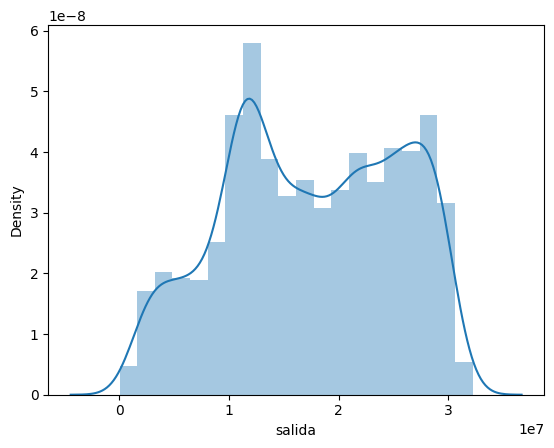

In [491]:
sns.distplot(df['salida']);

A simple vista podemos observar que hay una desviación en relación a una distribución normal. También observamos que hay dos picos

In [492]:
# Asimetría y curtosis:

print("Skewness: %f" % df['salida'].skew())
print("Kurtosis: %f" % df['salida'].kurt())

Skewness: -0.125917
Kurtosis: -1.054102


Ahora vamos a estudiar la relación de 'salida' con las otras variables proporcionadas. Tras entender lo que significa cada una de ellas y que cada una corresponde a una hora del día distinta, creemos que las variables que más influyen sobre el resultado de 'salida' son dswrf_sfc ya que se trata de la media del flujo radiativo de onda corta que llega desde el cielo a la superficie(descendiente), es decir, en donde se encuentran las plantas energéticas, ya que la radiación de onda corta contiene un nivel más alto de energía que la de onda larga, y por lo tanto influye en mayor medida en 'salida'. En cuanto a la hora, creemos que el que más influye serían aquellas horas que corresponden a la tarde, pues es cuando la temperatura suele ser la más alta (2 y 3 correspondientes a las 15h y 18h).

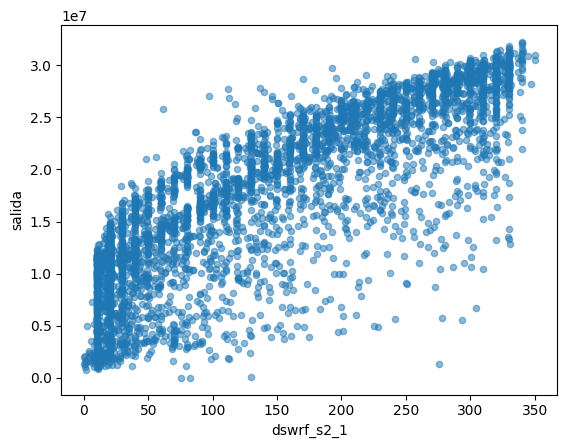

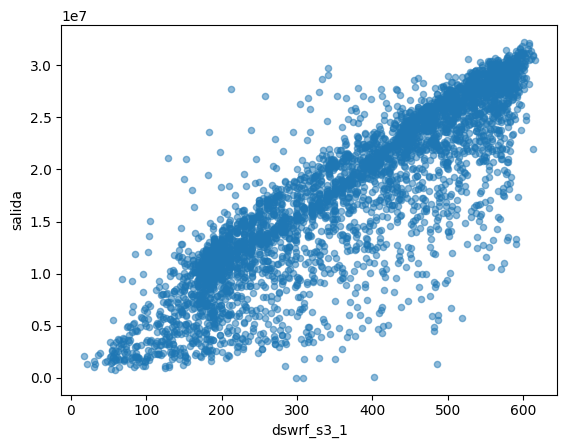

In [493]:
var1 = 'dswrf_s2_1'
var2 = 'dswrf_s3_1'
data = pd.concat([df['salida'], df[var1]], axis=1)
data.plot.scatter(x=var1, y='salida', alpha = 0.5);

data = pd.concat([df['salida'], df[var2]], axis=1)
data.plot.scatter(x=var2, y='salida', alpha = 0.5);

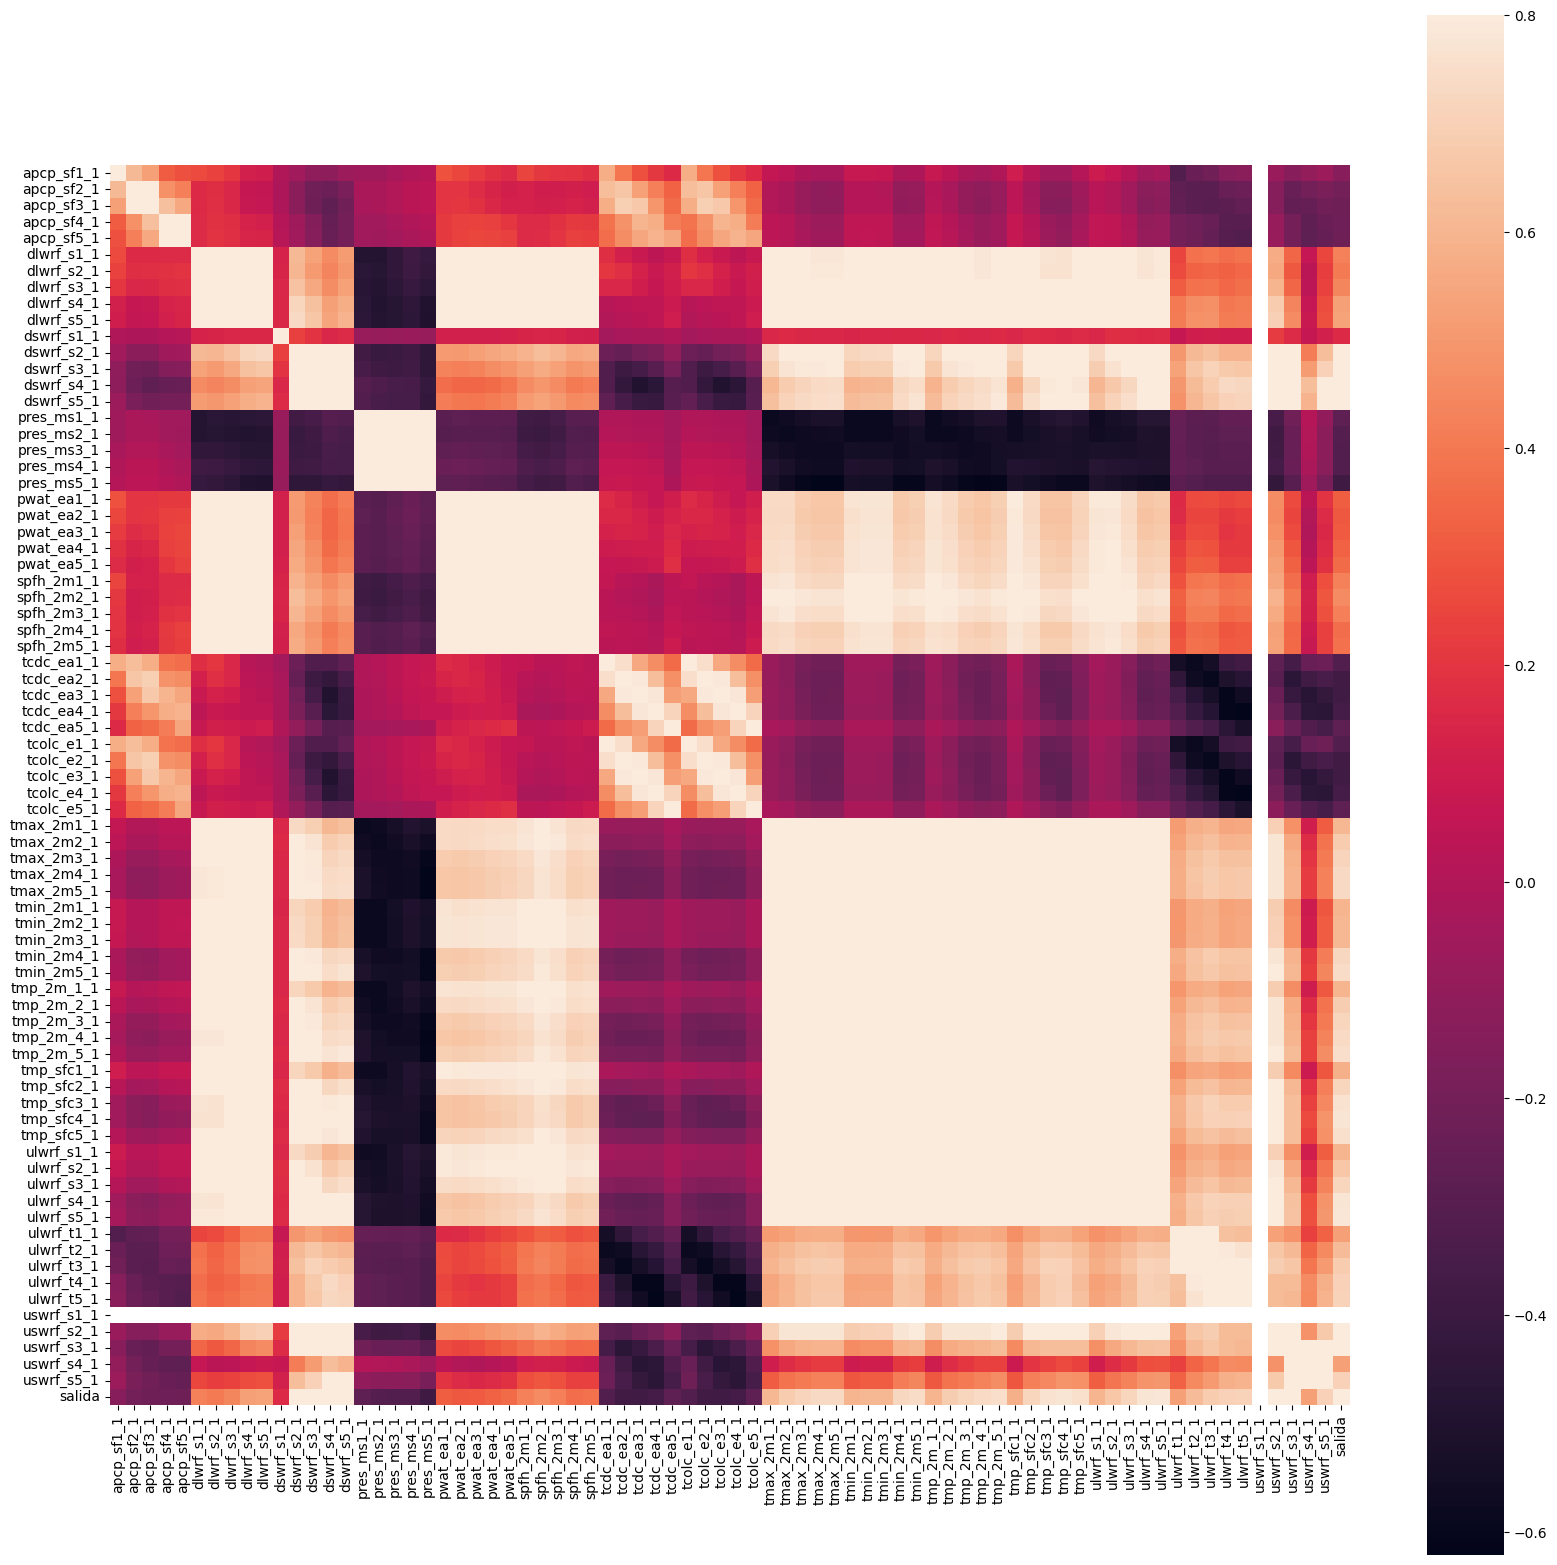

In [494]:
# Matriz de correlación:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

corrmat = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)

to_drop = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.95:
            colname = corrmat.columns[i]
            to_drop.add(colname)

Para obtener una mejor visualización de la correlación existente entre las variables, hemos generado un mapa de calor (heatmap). En este gráfico, los tonos más oscuros indican una alta correlación negativa entre variables, mientras que los tonos más claros indican una alta correlación positiva.

In [495]:
corr = df.corr()
corr[['salida']].sort_values(by = 'salida',ascending = False).style.background_gradient()

,salida
salida,1.000000
dswrf_s3_1,0.877270
dswrf_s5_1,0.876034
dswrf_s4_1,0.873229
uswrf_s2_1,0.842086
dswrf_s2_1,0.829018
uswrf_s3_1,0.798940
ulwrf_s5_1,0.778697
tmp_sfc4_1,0.777438
ulwrf_s4_1,0.775706


Podemos observar el valor real de correlación existente entre las variables de entrada y la variable de salida. Es importante destacar que cuanto mayor sea el grado de correlación entre una variable y la variable de salida, mayor será su influencia en esta última, lo cual resulta de gran interés para nuestro análisis.

Cabe destacar lo siguiente:
1. Las variables dswrf_sfc son las que más correlacion tiene con la variable 'salida' y se corresponden a la media de radiación de onda corta que llega del cielo en la superficie, más específicamente a las horas 2,3,4,5 (12h, 15h, 18h y 24h respectivamente)
2. Las variables uswrf_sfc que corresponde a la radiación de onda corta que procede del suelo sobre la superficie a las horas 2 y 3 también tienen un alto nivel de correlación.
3. A la hora 5, la variable ulwrf_sfc que corresponde a la radiación de onda larga que procede del suelo sobre la superficie tiene alta correlación con la salida.
4. Podemos destacar como la variables más correlacionada positiva es mucho mayor que la negativa (|0.87|>|-0.37|)

# **MÉTODOS BÁSICOS**

In [496]:
# Dividir datos en train y test
df_train = df[0:438]
df_test = df[438:]

## KNN

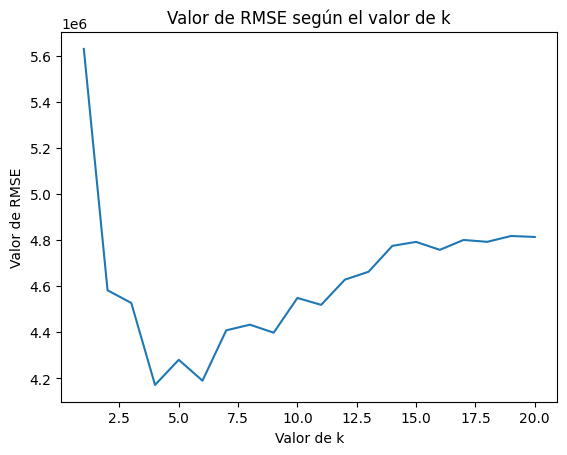

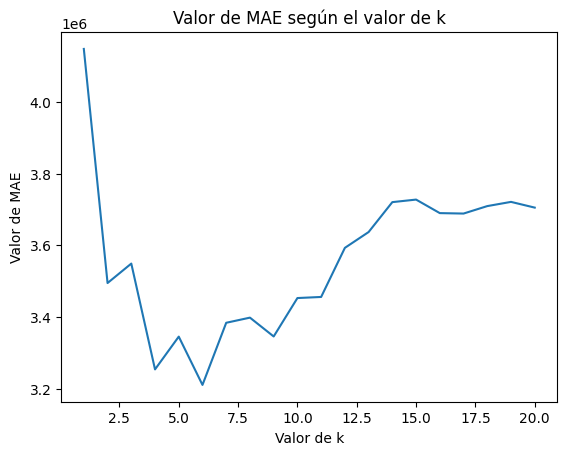

La media de RMSE es: 4,626,488
La media de MAE es: 3,561,382
Tiempo de ejecución: 0


In [497]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
import time
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('salida', axis=1), df_train['salida'], test_size=0.2)

# Crear el modelo KNN y entrenarlo, calculamos el timepo

# Calcular los valores RMSE y MAE según el valor de k e imprimirlos
rmse_val = []  # para almacenar los valores de RMSE para diferentes valores de k
mae_val = []  # para almacenar los valores de MAE para diferentes valores de k
time_val = [] #array de tiempo

np.random.seed(72)

for K in range(20):
    K = K+1
    
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    # entrenar el modelo
    start_time = time.perf_counter()
    knn.fit(x_train, y_train)
    end_time = time.perf_counter()

    execution_time = end_time - start_time
    time_val.append(execution_time)

    # predecir los valores de y para el conjunto de prueba
    y_pred = knn.predict(x_test)

    # calcular el RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_val.append(rmse)

    # calcular el MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_val.append(mae)

# Graficar los valores de RMSE según el valor de k
plt.plot(range(1, 21), rmse_val)
plt.title('Valor de RMSE según el valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Valor de RMSE')
plt.show()

# Graficar los valores de MAE según el valor de k
plt.plot(range(1, 21), mae_val)
plt.title('Valor de MAE según el valor de k')
plt.xlabel('Valor de k')
plt.ylabel('Valor de MAE')
plt.show()

# Calcular la media de rmse_val y mae_val
rmse_mean0 = np.mean(rmse_val)
mae_mean0 = np.mean(mae_val)
execution_time = np.mean(execution_time)

# Imprimir la media de rmse_val y mae_val
print("La media de RMSE es:", "{:,}".format(int(rmse_mean0)))
print("La media de MAE es:", "{:,}".format(int(mae_mean0)))
print("Tiempo de ejecución:", "{:,}".format(int(execution_time)))
     

Después de entrenar el modelo KNN y ajustar el hiperparámetro más importante k, se ha generado una gráfica para visualizar los resultados de manera más clara. En la gráfica, se puede apreciar que el valor de RMSE y MAE disminuye a medida que aumenta k, pero llega un punto crítico, aproximadamente cuando k = 4 para RMSE y k = 4 para MAE, donde el valor de RMSE y MAE deja de mejorar e incluso empeora. Esto ocurre porque cuándo k es muy grande se está considerando demasiada información y el modelo no puede generalizar bien a nuevos datos. Pero si cambiamos otros hiperparámetros esto puede cambiar la situación.

### Ajuste de hiperparámetros

In [498]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

def knnGridsearch(df_train):

  knn = neighbors.KNeighborsRegressor()

  # separar los datos en conjuntos de entrenamiento y prueba
  x_train, x_test, y_train, y_test = train_test_split(df_train.drop('salida', axis=1), df_train['salida'], test_size=0.2)

  # Definir la grilla de parámetros
  param_grid = {'n_neighbors': list(range(1, 20)),
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
                'metric': ['manhattan', 'euclidean', 'chebyshev', 'minkowski']}

  # Realizar la búsqueda de grilla
  grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # Predecir sobre el conjunto de prueba y calcular RMSE y MAE
  y_pred = grid_search.predict(x_test)
  rmse = mean_squared_error(y_test, y_pred, squared=False)
  mae = mean_absolute_error(y_test, y_pred)

  # Imprimir los mejores parámetros, valor, RMSE y MAE con comas
  print('Mejores parámetros:', grid_search.best_params_)
  print('RMSE: {:,}'.format(rmse))
  print('MAE: {:,}'.format(mae))

knnGridsearch(df_train)

Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
RMSE: 4,154,641.4622567096
MAE: 3,138,866.099741898


Este apartado está dedicado a ver cuales son los mejores hiperparámetros para este modelo de KNN. Con la implementación de grid_search podemos ver que los mejores hiperparámetros en este caso son {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}. El RMSE se ha reducido aproximadamente 9% mientras que el MAE se ha reducido un 8%. 

## ARBOL DE REGRESIÓN


In [499]:
from sklearn import metrics
from sklearn import tree

# Definimos nuestro modelo como árbol de decisión de regresión
clf = tree.DecisionTreeRegressor()

# Hacemos los resultados reproducibles en caso de que el entrenamiento del árbol contenga decisiones aleatorias
np.random.seed(6)

# Entrenamos nuestro modelo
clf.fit(x_train, y_train)

# Realizamos predicciones con nuestro modelo
clf_pred = clf.predict(x_test)

# Podemos ver el árbol generado
#print(tree.export_text(clf))

# Calculamos el RMSE
error_rmse = sqrt(mean_squared_error(clf_pred,y_test))
print('RMSE: {:,}'.format(error_rmse))

# Calculamos el MAE
mae_median = metrics.mean_absolute_error(y_test, clf_pred)
print('MAE: {:,}'.format(mae_median))


RMSE: 4,433,148.40965712
MAE: 3,042,334.090909091


###Ajuste de hiperparametros

In [500]:
def treeGridsearch(df_train):

  clf = tree.DecisionTreeRegressor()

  # Definir el grid de parámetros
  param_grid = {'max_depth': list(range(1, 21, 2)),
                'min_samples_split': [2, 5, 10, 20],
                'min_samples_leaf': [1, 5, 10, 20]}

  # Realizar la búsqueda en la rejilla
  grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # Obtener el mejor estimador de la búsqueda en la rejilla
  best_estimator = grid_search.best_estimator_

  # Realizar predicciones usando el mejor estimador
  y_pred = best_estimator.predict(x_test)

  # Calcular el RMSE y MAE
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  # Imprimir los mejores parámetros y puntuaciones, RMSE y MAE
  print('Mejores parámetros: {}'.format(grid_search.best_params_))
  #print('Mejor puntuación (neg_mean_squared_error): {:,}'.format(-grid_search.best_score_))
  print('RMSE: {:,}'.format(rmse))
  print('MAE: {:,}'.format(mae))

treeGridsearch(df_train)


Mejores parámetros: {'max_depth': 17, 'min_samples_leaf': 10, 'min_samples_split': 5}
RMSE: 3,872,342.216316674
MAE: 2,782,559.1650026026


Con la técnica gridsearch hemos concluido que {'max_depth': 13, 'min_samples_leaf': 10, 'min_samples_split': 20} son los mejores parámetros. Esto ha resultado en una mejora de 17% el el RMSE y 11% en el MAE.

In [501]:
# This loop checks what happens with the two criterions
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    np.random.seed(6)
    clf.fit(x_train,y_train)
    y_test_pred1 = clf.predict(x_test)

    error_rmse = sqrt(mean_squared_error(y_test_pred1,y_test)) #calculate rmse
    print('RMSE: {:,}'.format(error_rmse))

    mae_median = metrics.mean_absolute_error(y_test,y_test_pred1)
    print('MAE: {:,}'.format(mae_median))

    print('\n')

RMSE: 7,154,691.805683749
MAE: 5,233,779.545454546


RMSE: 5,121,481.587137297
MAE: 3,840,760.227272727




In [502]:
for max_depth in [1,2,3,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    np.random.seed(6)
    clf.fit(x_train,y_train)
    y_test_pred = clf.predict(x_test)

error_rmse = sqrt(mean_squared_error(y_test_pred,y_test)) #calculate rmse
print('RMSE: {:,}'.format(error_rmse))

mae_median = metrics.mean_absolute_error(y_test,y_test_pred)

print('MAE: {:,}'.format(mae_median))

RMSE: 7,154,691.805683749
MAE: 5,233,779.545454546


In [503]:
for min_samples in [2,10,20,30,100]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
    np.random.seed(42)
    clf.fit(x_train,y_train)
    y_test_pred3 = clf.predict(x_test)

error_rmse = sqrt(mean_squared_error(y_test_pred3,y_test)) #calculate rmse
print('RMSE: {:,}'.format(error_rmse))

mae_median = metrics.mean_absolute_error(y_test,y_test_pred3)

print('MAE: {:,}'.format(mae_median))

RMSE: 13,343,077.795016546
MAE: 11,378,175.0


In [504]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    np.random.seed(6)
    clf.fit(x_train,y_train)
    y_test_pred4 = clf.predict(x_test)

    error_rmse = sqrt(mean_squared_error(y_test_pred4,y_test)) #calculate rmse
    print('RMSE: {:,}'.format(error_rmse))

    mae_median = metrics.mean_absolute_error(y_test,y_test_pred4)
    print('MAE: {:,}'.format(mae_median))
    

RMSE: 7,154,691.805683749
MAE: 5,233,779.545454546
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818
RMSE: 9,147,116.20135126
MAE: 7,312,394.318181818


##Regresion lineal

In [505]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Here, we set our model to classification tree
clf = LinearRegression()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(6)

# Now, we train it
clf.fit(x_train, y_train)

clf_pred = clf.predict(x_test)
# We can see that the tree is inside
#print(tree.export_text(clf))
error_rmse = sqrt(mean_squared_error(clf_pred,y_test)) #calculate rmse
print('RMSE: {:,}'.format(error_rmse))

mae_median = metrics.mean_absolute_error(y_test, clf_pred)

print('MAE: {:,}'.format(mae_median))

RMSE: 3,636,891.713476352
MAE: 2,693,042.7932216446


###Ajuste de hiperparametros

In [506]:
def lineGridsearch(df_train):

  clf = LinearRegression()

  # separar los datos en conjuntos de entrenamiento y prueba
  x_train, x_test, y_train, y_test = train_test_split(df_train.drop('salida', axis=1), df_train['salida'], test_size=0.2)

  # Definir la rejilla de parámetros a buscar
  parametrosLR = {'fit_intercept': [True, False]}

  # Realizar la búsqueda en la rejilla
  grid_search = GridSearchCV(clf, parametrosLR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # Obtener el mejor modelo
  best_estimator = grid_search.best_estimator_

  # Hacer predicciones en el conjunto de prueba y calcular el RMSE y MAE
  y_pred = best_estimator.predict(x_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)

  # Imprimir los mejores parámetros, RMSE y MAE
  print('Mejores parámetros:', grid_search.best_params_)
  print('RMSE: {:,}'.format(rmse))
  print('MAE: {:,}'.format(mae))

lineGridsearch(df_train)

Mejores parámetros: {'fit_intercept': False}
RMSE: 3,380,589.125501326
MAE: 2,274,172.07836453


Tras ajustar los parámetros hemos obtenido una reducción del 0.6% en RMSE y 1.2% del MAE.


## Reducción de dimensionalidad

<Axes: >

<Figure size 2000x2000 with 0 Axes>

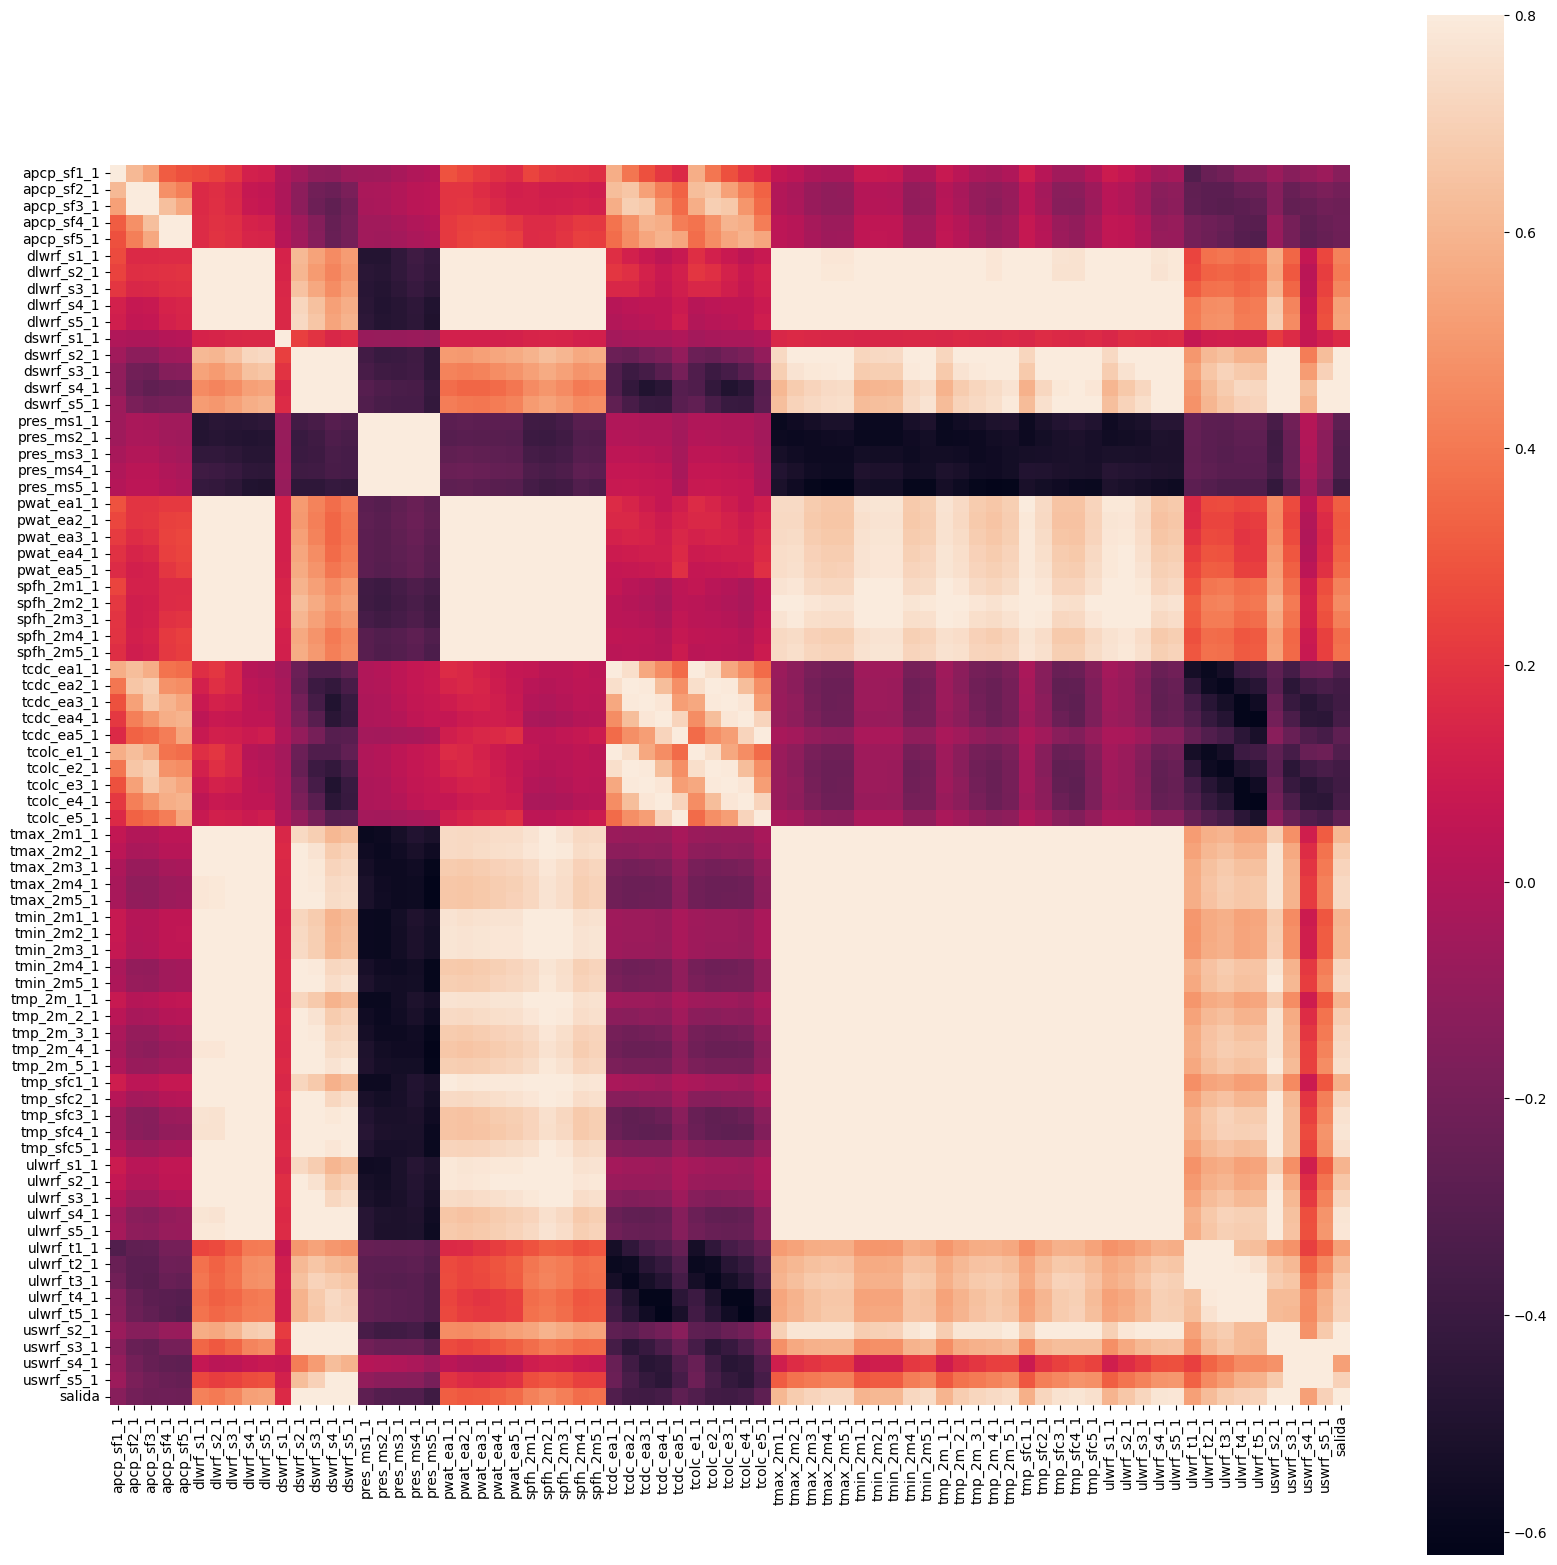

In [507]:
# Matriz de correlación:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

corrmat = df.corr()
plt.figure(figsize=(20,20))

# Identificamos las variables que vamos a quitar (>0.95)
to_drop = set()
for i in range(len(corrmat.columns)):
    for j in range(i):
        if abs(corrmat.iloc[i, j]) > 0.95:
            colname = corrmat.columns[i]
            to_drop.add(colname)

# Hacemos drop sobre esas variables
df_reducido = df.drop(to_drop, axis=1)
df_reducido = df.drop('uswrf_s1_1', axis=1)

# Imprimimos el segundo heatmap
corrmat = df_reducido.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, vmax=.8, square=True)


In [508]:
print('KNN=>')
knnGridsearch(df_reducido)
print('\n')
print('ÁRBOL DE REGRESIÓN=>')
treeGridsearch(df_reducido)
print('\n')
print('REGRESIÓN LINEAL=>')
lineGridsearch(df_reducido)



KNN=>
Mejores parámetros: {'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
RMSE: 3,419,303.4631018643
MAE: 2,360,062.975447158


ÁRBOL DE REGRESIÓN=>
Mejores parámetros: {'max_depth': 19, 'min_samples_leaf': 10, 'min_samples_split': 5}
RMSE: 3,867,129.234140861
MAE: 2,771,038.6071513626


REGRESIÓN LINEAL=>
Mejores parámetros: {'fit_intercept': False}
RMSE: 2,919,948.7399476212
MAE: 2,049,649.648473831


Podemos ver que reduciendo la dimesionalidad hemos conseguidos resultados mejores.